In [38]:
import sys
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable

ROOT_PATH = "../../.././"
MODEL_PATH = os.path.join(ROOT_PATH, "data/training/training_results")
DATA_PATH = os.path.join(ROOT_PATH, "data/preprocessing/processed_files")

def print_measures(y_pred : np.ndarray, y_true : np.ndarray, data_class : str = ""):
    assert type(y_pred) == np.ndarray, f"y_pred is of type {type(y_pred)} instead of 'np.ndarray'"
    assert type(y_true) == np.ndarray, f"y_true is of type {type(y_true)} instead of 'np.ndarray'!"

    if data_class:
        print(f"Printing {data_class} Measures")

    true_labels = list(np.unique(y_train_true))
    print(20*"-")
    print(f"Global measures")
    print(f"Number of entries: {len(y_pred)}")
    acc = accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True)
    print(f"Accuracy: {acc:.5f}")
    print("===" + 14*' ' + "===")
    print(f"Precision-µ: {precision_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"Recall-µ: {recall_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print(f"F1-Score-µ: {f1_score(y_true=y_true, y_pred=y_pred, average='micro'):.5f}")
    print("===" + 14*' ' + "===")
    print(f"Precision-M: {precision_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"Recall-M: {recall_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    print(f"F1-Score-M: {f1_score(y_true=y_true, y_pred=y_pred, average='macro'):.5f}")
    for label in true_labels:
        if (label in y_pred) and (label in y_true):
            y_pred_filtered = [1 if val == label else 0 for val in y_pred]
            y_true_filtered = [1 if val == label else 0 for val in y_true]
            print(20*"-")
            print(f"Measures for label '{label}'")
            print(f"Number of entries: {sum(y_true_filtered)}")
            prec = precision_score(y_true=y_true_filtered, y_pred=y_pred_filtered)
            print(f"Precision score: {prec:.5f}")
            print(f"Recall score: {recall_score(y_true=y_true_filtered, y_pred=y_pred_filtered):.5f}")
    return


def print_confusion_matrix(y_pred : np.ndarray, y_true : np.ndarray, data_class : str = ""):
    assert type(y_pred) == np.ndarray, f"y_pred is of type {type(y_pred)} instead of 'np.ndarray'"
    assert type(y_true) == np.ndarray, f"y_true is of type {type(y_true)} instead of 'np.ndarray'!"

    conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, normalize="true")

    fig, ax = plt.subplots()
    if data_class:
        ax.set_title(f"Confusion Matrix for {data_class} Data")
    else:
        ax.set_title("Confusion Matrix")
    ms = ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3, vmin=0, vmax=1)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x = j, y = i, s=f"{conf_matrix[i,j]:.2f}", va='center', ha='center', size='xx-large')

    minor_ticks = np.arange(-0.5,3.5,1)
    ax.set_xticks(minor_ticks, minor = True)
    ax.set_yticks(minor_ticks, minor = True)
    ax.grid(True, which="minor",axis="both", linewidth=0.25)
    ax.set_xlabel('Predictions')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('Actuals')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(ms, cax=cax)

    plt.show()
    return

def create_folder_strings(model_folder_end, data_folder_end):
    return os.path.join(MODEL_PATH, model_folder_end), os.path.join(DATA_PATH, data_folder_end)

def check_format(y):
    if isinstance(y, pd.DataFrame):
        logging.warning(f"Array y is type '{type(y)}'. Expected 'np.ndarray' and was changed to it.")
        y = y.to_numpy()
    y = y.ravel()
    return y

def get_target_data(true_target_folder : str, pred_target_folder: str, y_train_true_name = "y_train.pkl", y_test_true_name = "y_test.pkl", y_train_pred_name = "y_train_pred.pkl", y_test_pred_name = "y_test_pred.pkl"):
    
    if not os.path.exists(os.path.join(true_target_folder, y_train_true_name)):
        y_train_true_name = "y_train_df.pkl"
    if not os.path.exists(os.path.join(true_target_folder, y_test_true_name)):
        y_test_true_name = "y_test_df.pkl"
    
    _y_train_true = np.load(os.path.join(true_target_folder, y_train_true_name), allow_pickle=True)
    _y_train_true = check_format(_y_train_true)
    _y_test_true = np.load(os.path.join(true_target_folder, y_test_true_name), allow_pickle=True)
    _y_test_true = check_format(_y_test_true)
    _y_train_pred = np.load(os.path.join(pred_target_folder, y_train_pred_name), allow_pickle=True)
    _y_train_pred = check_format(_y_train_pred)
    _y_test_pred = np.load(os.path.join(pred_target_folder, y_test_pred_name), allow_pickle=True)
    _y_test_pred = check_format(_y_test_pred)
    return (_y_train_pred, _y_train_true), (_y_test_pred, _y_test_true)

def print_eval(model_folder_end, data_folder_end):
    model_path, data_path = create_folder_strings(model_folder_end=model_folder_end, data_folder_end=data_folder_end)
    y_train_tuple, y_test_tuple = get_target_data(true_target_folder=data_path, pred_target_folder=model_path) 
    print_measures(y_pred=y_train_tuple[0], y_true=y_train_tuple[1], data_class="Train")
    print_confusion_matrix(y_pred=y_train_tuple[0], y_true=y_train_tuple[1], data_class="Train")
    print_measures(y_pred=y_test_tuple[0], y_true=y_test_tuple[1], data_class="Test")
    print_confusion_matrix(y_pred=y_test_tuple[0], y_true=y_test_tuple[1], data_class="Test")
    
def create_performance_table(y_pred : np.ndarray, y_true : np.ndarray, data_class : str = ""):
    assert type(y_pred) == np.ndarray, f"y_pred is of type {type(y_pred)} instead of 'np.ndarray'"
    assert type(y_true) == np.ndarray, f"y_true is of type {type(y_true)} instead of 'np.ndarray'!"
    
    performance_list = []
    
    if data_class:
        print(f"Creating table for {data_class} Measures")

    true_labels = list(np.unique(y_train_true))
    acc = accuracy_score(y_true=y_true, y_pred=y_pred, normalize=True)
    performance_list.append(["Accuracy", f"{acc*100:.2f}"])
    
    prec_µ = precision_score(y_true=y_true, y_pred=y_pred, average='micro')
    performance_list.append(["Precision-µ", f"{prec_µ*100:.2f}"])
    
    recall_µ = recall_score(y_true=y_true, y_pred=y_pred, average='micro')
    performance_list.append(["Recall-µ", f"{recall_µ*100:.2f}"])
    
    f1_µ = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    performance_list.append(["F1-Score-µ", f"{f1_µ*100:.2f}"])
    
    prec_M = precision_score(y_true=y_true, y_pred=y_pred, average='macro')
    performance_list.append(["Precision-M", f"{prec_M*100:.2f}"])
    
    rec_M = recall_score(y_true=y_true, y_pred=y_pred, average='macro')
    performance_list.append(["Recall-M", f"{rec_M*100:.2f}"])
    
    f1_M = f1_score(y_true=y_true, y_pred=y_pred, average='macro')
    performance_list.append(["F1-Score-M", f"{f1_M*100:.2f}"])
    
    for label in true_labels:
        if (label in y_pred) and (label in y_true):
            y_pred_filtered = [1 if val == label else 0 for val in y_pred]
            y_true_filtered = [1 if val == label else 0 for val in y_true]
            
            performance_list.append(["Number of Entries", sum(y_true_filtered)])
            
            prec = precision_score(y_true=y_true_filtered, y_pred=y_pred_filtered)
            performance_list.append(["Prec_" + str(label), f"{prec*100:.2f}"])
            
            rec = recall_score(y_true=y_true_filtered, y_pred=y_pred_filtered)
            performance_list.append(["Rec_" + str(label), f"{rec*100:.2f}"])
    
    df = pd.DataFrame(data=performance_list, columns=["Name", "Value"])
    return df


# Baseline Evaluation

## Evenly-Distributed Baseline

In [39]:
y_train_true = pd.read_pickle(MODEL_PATH + "/BL/y_train_true.pkl").to_numpy()
y_train_pred = pd.read_pickle(MODEL_PATH + "/BL/y_train_pred_even.pkl").to_numpy()
y_test_true = pd.read_pickle(MODEL_PATH + "/BL/y_test_true.pkl").to_numpy()
y_test_pred = pd.read_pickle(MODEL_PATH + "/BL/y_test_pred_even.pkl").to_numpy()

#### Train

Printing Training Measures
--------------------
Global measures
Number of entries: 263204
Accuracy: 0.33359
===              ===
Precision-µ: 0.33359
Recall-µ: 0.33359
F1-Score-µ: 0.33359
===              ===
Precision-M: 0.33337
Recall-M: 0.33343
F1-Score-M: 0.30492
--------------------
Measures for label '0'
Number of entries: 71145
Precision score: 0.26898
Recall score: 0.33104
--------------------
Measures for label '1'
Number of entries: 157691
Precision score: 0.59998
Recall score: 0.33448
--------------------
Measures for label '2'
Number of entries: 34368
Precision score: 0.13114
Recall score: 0.33476


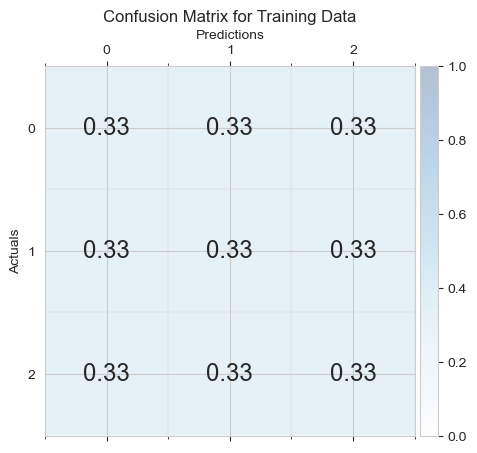

In [40]:
print_measures(y_pred=y_train_pred, y_true=y_train_true, data_class="Training")
print_confusion_matrix(y_pred=y_train_pred, y_true=y_train_true, data_class="Training")

#### Test

Printing Test Measures
--------------------
Global measures
Number of entries: 65801
Accuracy: 0.33138
===              ===
Precision-µ: 0.33138
Recall-µ: 0.33138
F1-Score-µ: 0.33138
===              ===
Precision-M: 0.33132
Recall-M: 0.33091
F1-Score-M: 0.30300
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.27011
Recall score: 0.33169
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.59490
Recall score: 0.33167
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.12896
Recall score: 0.32938


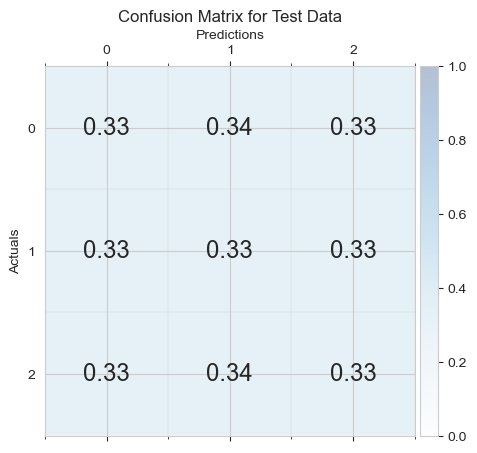

In [41]:
print_measures(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
print_confusion_matrix(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")

## Training-Distributed Baseline

In [42]:
y_train_true = pd.read_pickle(MODEL_PATH + "/BL/y_train_true.pkl").to_numpy()
y_train_pred = pd.read_pickle(MODEL_PATH + "/BL/y_train_pred_dist.pkl").to_numpy()
y_test_true = pd.read_pickle(MODEL_PATH + "/BL/y_test_true.pkl").to_numpy()
y_test_pred = pd.read_pickle(MODEL_PATH + "/BL/y_test_pred_dist.pkl").to_numpy()

#### Train

Printing Train Measures
--------------------
Global measures
Number of entries: 263204
Accuracy: 0.45030
===              ===
Precision-µ: 0.45030
Recall-µ: 0.45030
F1-Score-µ: 0.45030
===              ===
Precision-M: 0.33444
Recall-M: 0.33444
F1-Score-M: 0.33444
--------------------
Measures for label '0'
Number of entries: 71145
Precision score: 0.27153
Recall score: 0.27143
--------------------
Measures for label '1'
Number of entries: 157691
Precision score: 0.59997
Recall score: 0.60052
--------------------
Measures for label '2'
Number of entries: 34368
Precision score: 0.13182
Recall score: 0.13137


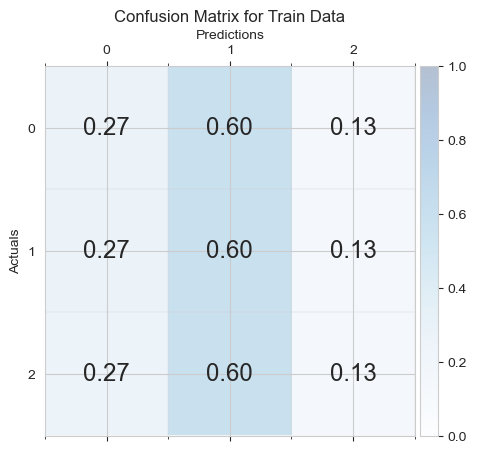

In [43]:
print_measures(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")
print_confusion_matrix(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")

#### Test

Printing Test Measures
--------------------
Global measures
Number of entries: 65801
Accuracy: 0.45013
===              ===
Precision-µ: 0.45013
Recall-µ: 0.45013
F1-Score-µ: 0.45013
===              ===
Precision-M: 0.33337
Recall-M: 0.33337
F1-Score-M: 0.33337
--------------------
Measures for label '0'
Number of entries: 17839
Precision score: 0.27159
Recall score: 0.26975
--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.59963
Recall score: 0.60211
--------------------
Measures for label '2'
Number of entries: 8592
Precision score: 0.12889
Recall score: 0.12826


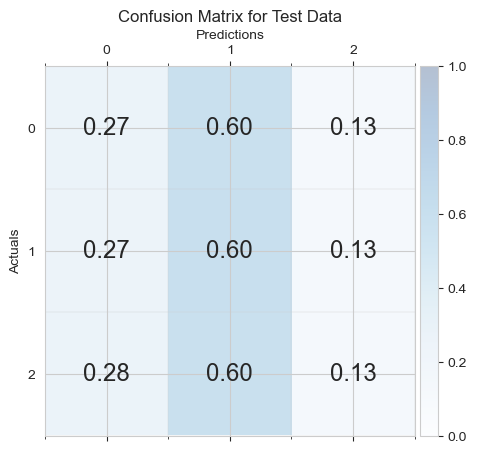

In [44]:
print_measures(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
print_confusion_matrix(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")

## Majority-Guessing Baseline

In [45]:
y_train_true = pd.read_pickle(MODEL_PATH + "/BL/y_train_true.pkl").to_numpy()
y_train_pred = pd.read_pickle(MODEL_PATH + "/BL/y_train_pred_maj.pkl").to_numpy()
y_test_true = pd.read_pickle(MODEL_PATH + "/BL/y_test_true.pkl").to_numpy()
y_test_pred = pd.read_pickle(MODEL_PATH + "/BL/y_test_pred_maj.pkl").to_numpy()

#### Train

Printing Train Measures
--------------------
Global measures
Number of entries: 263204
Accuracy: 0.59912
===              ===
Precision-µ: 0.59912
Recall-µ: 0.59912
F1-Score-µ: 0.59912
===              ===


C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision-M: 0.19971
Recall-M: 0.33333
F1-Score-M: 0.24977
--------------------
Measures for label '1'
Number of entries: 157691
Precision score: 0.59912
Recall score: 1.00000


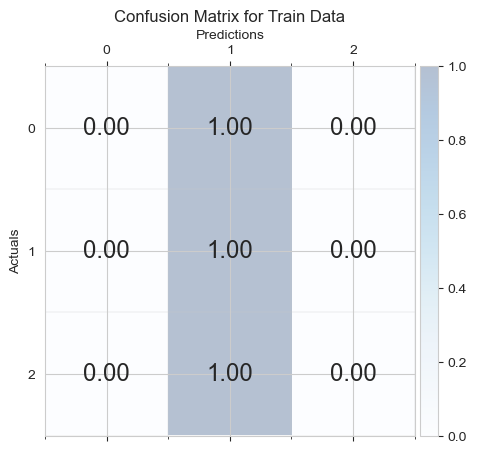

In [46]:
print_measures(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")
print_confusion_matrix(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")

#### Test

Printing Test Measures
--------------------
Global measures
Number of entries: 65801
Accuracy: 0.59832
===              ===
Precision-µ: 0.59832
Recall-µ: 0.59832
F1-Score-µ: 0.59832
===              ===
Precision-M: 0.19944
Recall-M: 0.33333
F1-Score-M: 0.24956


C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------------------
Measures for label '1'
Number of entries: 39370
Precision score: 0.59832
Recall score: 1.00000


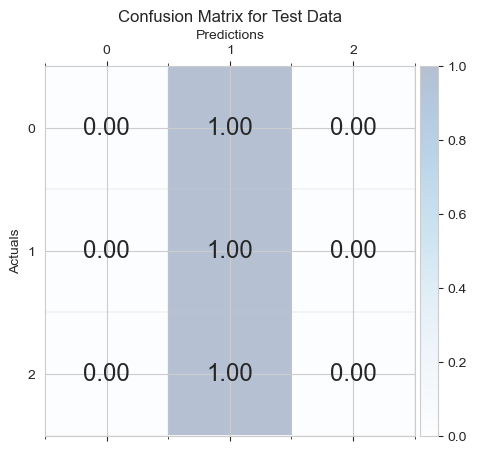

Creating table for Test Measures


C:\Users\chrig\anaconda3\envs\ma-env39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Name,Value
0,Accuracy,59.83
1,Precision-µ,59.83
2,Recall-µ,59.83
3,F1-Score-µ,59.83
4,Precision-M,19.94
5,Recall-M,33.33
6,F1-Score-M,24.96
7,Number of Entries,39370
8,Prec_1,59.83
9,Rec_1,100.00


In [47]:
print_measures(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
print_confusion_matrix(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
create_performance_table(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")

## Delay Baseline

In [48]:
y_train_true = pd.read_pickle(MODEL_PATH + "/BL/y_train_true_B.pkl").to_numpy()
y_train_pred = pd.read_pickle(MODEL_PATH + "/BL/y_train_pred_delay.pkl").to_numpy()
y_test_true = pd.read_pickle(MODEL_PATH + "/BL/y_test_true_B.pkl").to_numpy()
y_test_pred = pd.read_pickle(MODEL_PATH + "/BL/y_test_pred_delay.pkl").to_numpy()

### Train

Printing Train Measures
--------------------
Global measures
Number of entries: 278508
Accuracy: 0.64218
===              ===
Precision-µ: 0.64218
Recall-µ: 0.64218
F1-Score-µ: 0.64218
===              ===
Precision-M: 0.72639
Recall-M: 0.57776
F1-Score-M: 0.51245
--------------------
Measures for label '0'
Number of entries: 83006
Precision score: 0.79698
Recall score: 0.00828
--------------------
Measures for label '1'
Number of entries: 158258
Precision score: 0.62279
Recall score: 0.94137
--------------------
Measures for label '2'
Number of entries: 37244
Precision score: 0.75939
Recall score: 0.78362


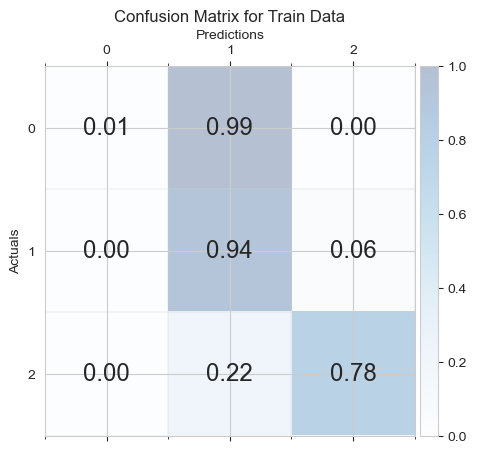

Creating table for Train Measures


,Name,Value
0,Accuracy,64.22
1,Precision-µ,64.22
2,Recall-µ,64.22
3,F1-Score-µ,64.22
4,Precision-M,72.64
5,Recall-M,57.78
6,F1-Score-M,51.24
7,Number of Entries,83006
8,Prec_0,79.70
9,Rec_0,0.83


In [49]:
print_measures(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")
print_confusion_matrix(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")
create_performance_table(y_pred=y_train_pred, y_true=y_train_true, data_class="Train")

### Test

Printing Test Measures
--------------------
Global measures
Number of entries: 69628
Accuracy: 0.64172
===              ===
Precision-µ: 0.64172
Recall-µ: 0.64172
F1-Score-µ: 0.64172
===              ===
Precision-M: 0.75080
Recall-M: 0.57562
F1-Score-M: 0.51118
--------------------
Measures for label '0'
Number of entries: 20752
Precision score: 0.87047
Recall score: 0.00810
--------------------
Measures for label '1'
Number of entries: 39565
Precision score: 0.62226
Recall score: 0.94237
--------------------
Measures for label '2'
Number of entries: 9311
Precision score: 0.75967
Recall score: 0.77639


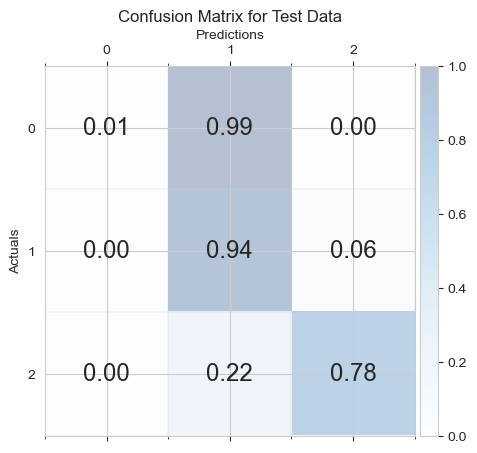

In [50]:
print_measures(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")
print_confusion_matrix(y_pred=y_test_pred, y_true=y_test_true, data_class="Test")

# RandomForest Evaluation

## Version from 2023_02_06-1122

In [51]:
print_eval(model_folder_end="RF/2023_02_06-1122", data_folder_end="NEW")

FileNotFoundError: [Errno 2] No such file or directory: '../../.././data/preprocessing/processed_files\\NEW\\y_train_df.pkl'

## Version from 2023_06_21-2317

In [ ]:
print_eval(model_folder_end="RF/2023_06_21-2317", data_folder_end="B")

## Version from 2024_01_25-1817

In [ ]:
print_eval(model_folder_end="RF/2024_01_25-1817", data_folder_end="B")

## Version from 2024_02_10-1212

In [ ]:
print_eval(model_folder_end="RF/2024_02_10-1212", data_folder_end="B")

## Version from 2024_06_02-0115

In [ ]:
print_eval(model_folder_end="RF/2024_06_02-0115", data_folder_end="CCLASS")

## Version from 2024_06_17-0522

In [ ]:
print_eval(model_folder_end="RF/2024_06_17-0522", data_folder_end="DCLASS")

## Version from 2024_06_17-0642

In [ ]:
print_eval(model_folder_end="RF/2024_06_17-0642", data_folder_end="CCLASS")

# Support Vector Classifier Evaluation

## Version from 2023_02_23-1711

In [ ]:
print_eval(model_folder_end="SVC/2023_02_23-1711", data_folder_end="NEW")

# Naive Bayes Classifier
## Version from 2023_02_22-0901

In [ ]:
print_eval(model_folder_end="NB/2023_02_22-0901", data_folder_end="NEW")

# Multi-Layer Perceptron Classifier
## Version from 2023_02_22-0527

In [ ]:
print_eval(model_folder_end="MLP/2023_02_22-0527", data_folder_end="NEW")

# ADABOOST Classifier

## Version from 2024_06_16-0229

In [ ]:
print_eval("ADAB/2024_06_16-0229", "CCLASS")

# XGB Evaluation

## Version from 2024_06_17-1513

In [ ]:
print_eval("XGB/2024_06_17-1513", "CCLASS")

# K-Nearest-Neighbours Classifier

## Version from 2024_01_26-0007

In [ ]:
print_eval(model_folder_end="KNN/2024_01_26-0007", data_folder_end="B")